In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pwd
!ls

/content
drive  sample_data


In [ ]:
import os
os.chdir("/content/drive/MyDrive/proyecto2/TIFF")
!ls

In [ ]:
from PIL import Image
import urllib.request

import ee # Google Earth Engine
from os import system

In [ ]:
 import ee
 ee.Authenticate()
 ee.Initialize(project='ee-santiagobautista2346')

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_0JLhFqfSY1uiEaW?source=Init


In [ ]:
%pwd

'/content/drive/MyDrive/proyecto2/TIFF'

In [ ]:
import urllib.request
from PIL import Image
import ee

# Inicializamos la API de Earth Engine (si no está inicializada)
ee.Initialize()

def sentinel2(start_date, end_date, geometry, imageVisParam):
    IMGSentinel = ee.ImageCollection('COPERNICUS/S2_SR') \
                  .filterDate(start_date, end_date) \
                  .filterBounds(geometry) \
                  .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'Less_Than', 30)
    print("size: ", IMGSentinel.size().getInfo())

    collectionList = IMGSentinel.toList(IMGSentinel.size())
    collectionSize = collectionList.size().getInfo()

    imgs = []
    fechas = []
    for i in range(collectionSize):
        SentinelFiltro = ee.Image(collectionList.get(i))
        SentinelClip = SentinelFiltro.clip(geometry)

        # Extraemos las bandas sin visualización, simplemente como imagen multibanda
        imagen = SentinelClip.select(["B2", "B3", "B4", "B5", "B6", "B7", "B8", "B11", "B12"])


        # Obtener la URL de la imagen para descargarla
        url = imagen.getDownloadURL({
            'scale': 10,  # Resolución espacial más alta (10 metros por píxel)
            'region': geometry,  # Región de interés
            'format': 'GeoTIFF',  # Formato de archivo GeoTIFF
            'crs': 'EPSG:4326',  # Sistema de coordenadas geográficas
            'maxPixels': 1e8  # Aumentar el límite de píxeles para una descarga más grande si es necesario
        })
        print(ee.Date(ee.Image(collectionList.get(i)).get('system:time_start')).format('Y-M-d').getInfo())

        imgs.append(url)  # Guardar la URL para la descarga
        fechas.append(ee.Date(ee.Image(collectionList.get(i)).get('system:time_start')).format('Y-M-d').getInfo())
    return (imgs, fechas)

def download_image(list_imagenRGB, rutaImg, extension, view_url=False):
    for i, url in enumerate(list_imagenRGB):
        try:
            if view_url:
                print(url)  # Mostrar la URL de descarga

            # Descargar el archivo GeoTIFF
            response = urllib.request.urlopen(url)
            with open(rutaImg[i], 'wb') as f:
                f.write(response.read())

            print("Estatus de la descarga: ", True)
        except Exception as e:
            print("Error en la descarga:", e)
            print("Estatus de la descarga: ", False)

geometry_facatativa = ee.Geometry.MultiPolygon(
    [[[-74.39166033728702, 4.784192477101554],
      [-74.31784594519718, 4.784192477101554],
      [-74.31784594519718, 4.840469978062905],
      [-74.39166033728702, 4.840469978062905],
      [-74.39166033728702, 4.784192477101554]]],
    None, False)

# Parámetros de visualización para tres bandas (pero no afecta la descarga de imágenes multibanda)
imageVisParam = {"bands": ["B4", "B3", "B2"], "min": 0, "max": 5000}

# Fechas y extensión para la descarga
start_date = '2020-01-01'
end_date = '2020-12-28'
ext = 'tif'  # Formato TIFF

# Llamada a la función para obtener las imágenes de Sentinel-2
img_sat, fechas = sentinel2(start_date, end_date, geometry_facatativa, imageVisParam)

# Crear nombres para las imágenes de salida, incluyendo fechas y bandas seleccionadas
output_img = ['facatativa' + fecha.replace('-', '_') + "_" + str(i) + '.' + ext for i, fecha in enumerate(fechas)]

# Descargar y guardar las imágenes multibanda (con todas las bandas seleccionadas)
download_image(img_sat, output_img, ext, view_url=True)

size:  14
2020-1-4
2020-1-9
2020-1-14
2020-2-3
2020-2-13
2020-2-18
2020-3-4
2020-6-7
2020-8-11
2020-8-31
2020-9-5
2020-9-10
2020-11-29
2020-12-4
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/18f2db00bf776da302159c8bd0aa26d9-bc4f38a5ca8150d8e2f59aa4549aa2a7:getPixels
Estatus de la descarga:  True
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/02d6370afc979f479bb8b3fd01c943fb-258a6ddc45674378f43964aa3b90d774:getPixels
Estatus de la descarga:  True
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/4e7211e366feacaa898ac97ee1324334-eb202315fe045ba0a0438e6e9028c527:getPixels
Estatus de la descarga:  True
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/2bb936f21028233e74c2a79cf41def9a-16e8b2894d5c6daa22832d87a2d890f9:getPixels
Estatus de la descarga:  True
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/70277213d350a8119c3e0

In [ ]:
!pip install rasterio numpy matplotlib

In [ ]:
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
imagen_satelital = rasterio.open(r"/content/drive/MyDrive/proyecto2/TIFF/facatativa2020_2_13_4.tif")

In [ ]:
banda_azul = imagen_satelital.read(2)
banda_azul_norm = banda_azul / banda_azul.max()
banda_azul_norm

array([[0.06469003, 0.06581312, 0.06345463, ..., 0.02060872, 0.02105795,
        0.0234726 ],
       [0.06345463, 0.06592543, 0.06570081, ..., 0.02240566, 0.02167565,
        0.02229335],
       [0.0631177 , 0.06278077, 0.06266846, ..., 0.02263028, 0.02167565,
        0.02173181],
       ...,
       [0.05340296, 0.05918688, 0.06940701, ..., 0.01757637, 0.02229335,
        0.02538185],
       [0.05177448, 0.05840072, 0.06884546, ..., 0.02482031, 0.01898023,
        0.02257412],
       [0.05160602, 0.05884996, 0.06469003, ..., 0.04262129, 0.02173181,
        0.01460018]])

In [ ]:
banda_verde = imagen_satelital.read(3)
banda_verde_norm = banda_verde / banda_verde.max()
banda_verde_norm

array([[0.06979755, 0.07015066, 0.06967985, ..., 0.01335923, 0.02118644,
        0.02954331],
       [0.07003296, 0.07003296, 0.07168079, ..., 0.01753766, 0.02660075,
        0.03077919],
       [0.07285782, 0.07003296, 0.06920904, ..., 0.02289313, 0.02889595,
        0.02866055],
       ...,
       [0.03925377, 0.05667373, 0.07415254, ..., 0.01541902, 0.01812618,
        0.01895009],
       [0.03895951, 0.05390772, 0.07391714, ..., 0.0266596 , 0.01465395,
        0.01600753],
       [0.03801789, 0.05125942, 0.06567797, ..., 0.04772834, 0.02206921,
        0.01235876]])

In [ ]:
banda_rojo = imagen_satelital.read(4)
banda_rojo_norm = banda_rojo / banda_rojo.max()
banda_rojo_norm

array([[0.11806128, 0.11780752, 0.11780752, ..., 0.04180676, 0.04129925,
        0.04129925],
       [0.11806128, 0.11780752, 0.11780752, ..., 0.04193364, 0.04022077,
        0.04022077],
       [0.12516653, 0.12015479, 0.12015479, ..., 0.04193364, 0.04022077,
        0.04022077],
       ...,
       [0.09706274, 0.11317643, 0.11317643, ..., 0.03984013, 0.03984013,
        0.05303559],
       [0.09211445, 0.11013132, 0.11013132, ..., 0.05265495, 0.05265495,
        0.03736598],
       [0.09211445, 0.11013132, 0.11013132, ..., 0.05265495, 0.05265495,
        0.03736598]])

In [ ]:
banda_infrarojo = imagen_satelital.read(5)
banda_infrarojo_norm = banda_infrarojo / banda_infrarojo.max()
banda_infrarojo_norm

array([[0.21841247, 0.23175063, 0.23175063, ..., 0.18071765, 0.10025372,
        0.10025372],
       [0.21841247, 0.23175063, 0.23175063, ..., 0.15085176, 0.07372236,
        0.07372236],
       [0.21544038, 0.21899239, 0.21899239, ..., 0.15085176, 0.07372236,
        0.07372236],
       ...,
       [0.25516491, 0.21768757, 0.21768757, ..., 0.10177601, 0.10177601,
        0.15585357],
       [0.26197898, 0.23675245, 0.23675245, ..., 0.11177963, 0.11177963,
        0.11185212],
       [0.26197898, 0.23675245, 0.23675245, ..., 0.11177963, 0.11177963,
        0.11185212]])

In [ ]:
banda_swir1 = imagen_satelital.read(6)
banda_swir1_norm = banda_swir1 / banda_swir1.max()
banda_swir1_norm

array([[0.26650034, 0.27867241, 0.27867241, ..., 0.21856808, 0.1261813 ,
        0.1261813 ],
       [0.26650034, 0.27867241, 0.27867241, ..., 0.16844334, 0.10281999,
        0.10281999],
       [0.25614274, 0.2679368 , 0.2679368 , ..., 0.16844334, 0.10281999,
        0.10281999],
       ...,
       [0.30558706, 0.26234218, 0.26234218, ..., 0.13003705, 0.13003705,
        0.20647161],
       [0.31639828, 0.28283057, 0.28283057, ..., 0.12701293, 0.12701293,
        0.14001663],
       [0.31639828, 0.28283057, 0.28283057, ..., 0.12701293, 0.12701293,
        0.14001663]])

In [ ]:
banda_swir2 = imagen_satelital.read(7)
banda_swir2_norm = banda_swir2 / banda_swir2.max()
banda_swir2_norm

array([[0.23842249, 0.24040367, 0.2405894 , ..., 0.17774889, 0.12041852,
        0.08537642],
       [0.23644131, 0.24523279, 0.24430411, ..., 0.16864785, 0.09980188,
        0.07602774],
       [0.23229321, 0.24083705, 0.24337543, ..., 0.12233779, 0.08079495,
        0.07249876],
       ...,
       [0.26207281, 0.23922734, 0.22319217, ..., 0.06909361, 0.11416543,
        0.16530461],
       [0.2636206 , 0.24188955, 0.22925953, ..., 0.09243437, 0.09478702,
        0.13348192],
       [0.26547796, 0.25148588, 0.24040367, ..., 0.1433259 , 0.08611937,
        0.07454185]])

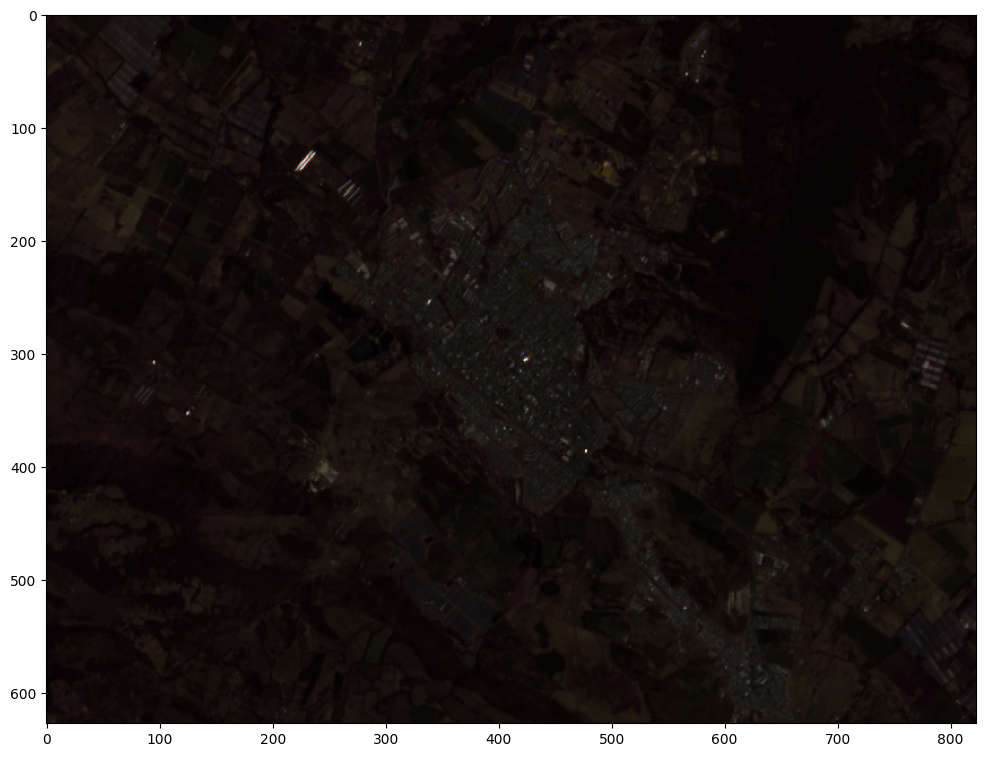

In [ ]:
composicion = np.dstack((banda_rojo_norm, banda_verde_norm, banda_azul_norm))
plt.subplots(figsize = (12, 12))
plt.imshow(composicion)

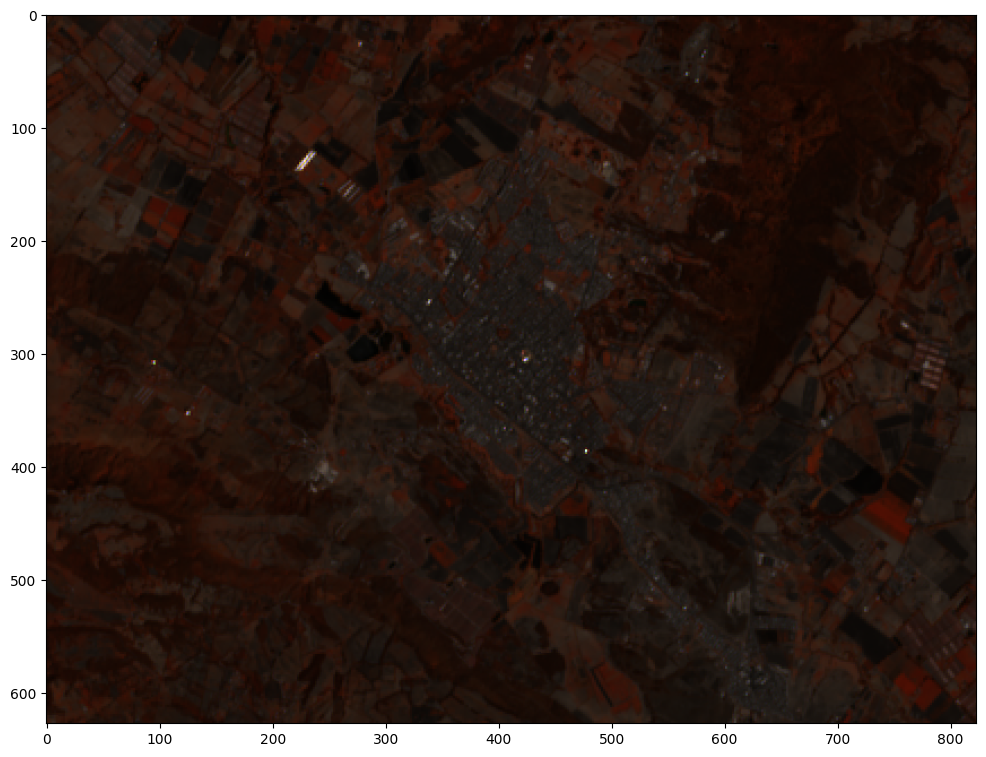

In [ ]:
composicion = np.dstack((banda_infrarojo_norm, banda_rojo_norm, banda_verde_norm))
plt.subplots(figsize = (12, 12))
plt.imshow(composicion)

In [ ]:
NDVI = ((banda_infrarojo_norm - banda_rojo_norm) / (banda_infrarojo_norm + banda_rojo_norm))

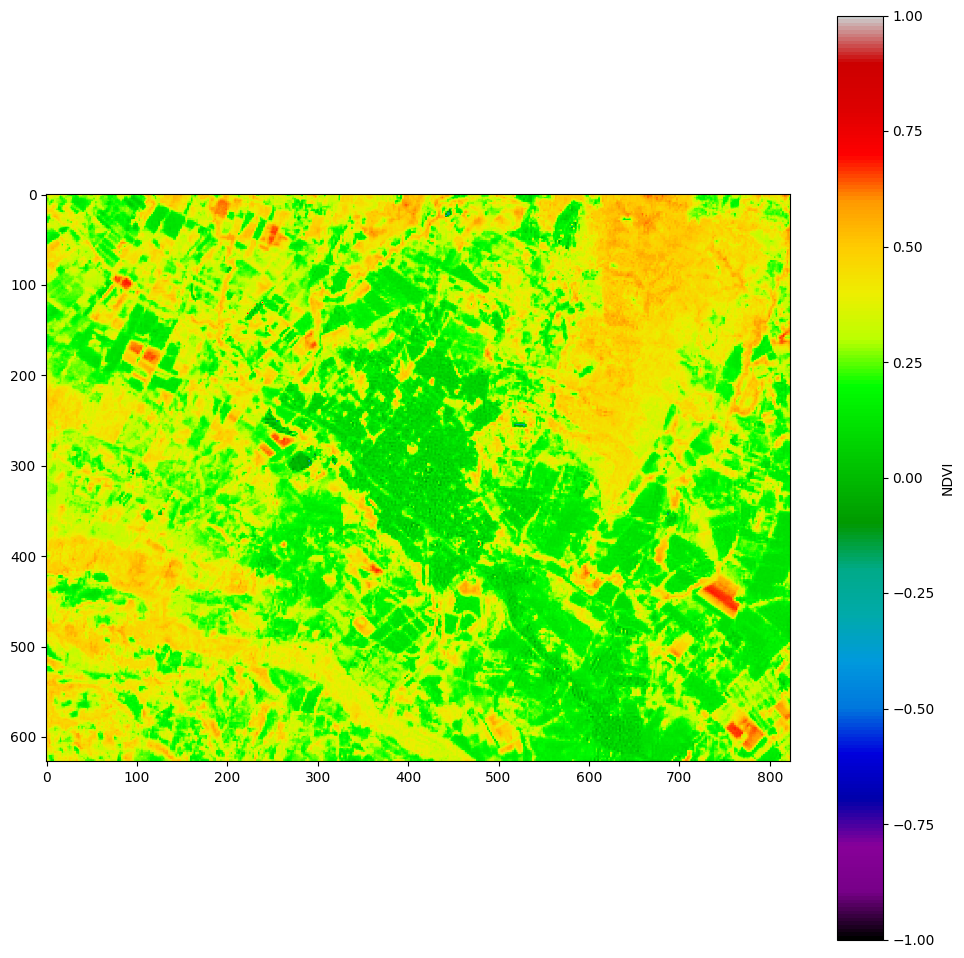

In [ ]:
plt.subplots(figsize = (12, 12))
plt.imshow(NDVI, cmap='nipy_spectral', vmin=-1, vmax=1)
plt.colorbar(label='NDVI')

# Filtro de Suavizado (Media o Gaussiano)


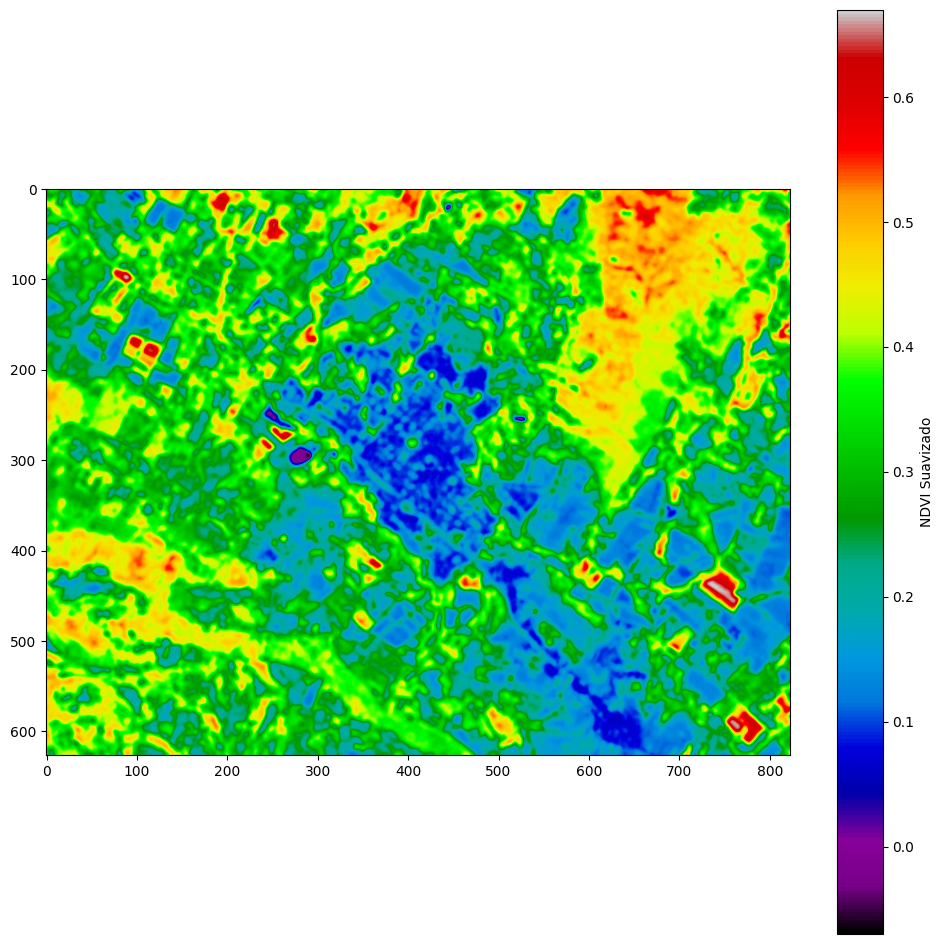

In [ ]:
from scipy.ndimage import gaussian_filter

# Suavizar la banda del NDVI
NDVI_suavizado = gaussian_filter(NDVI, sigma=2)  # sigma controla el grado de suavizado
plt.subplots(figsize = (12, 12))
plt.imshow(NDVI_suavizado, cmap='nipy_spectral')
plt.colorbar(label='NDVI Suavizado')


# Filtro Laplaciano (Realce de Bordes)

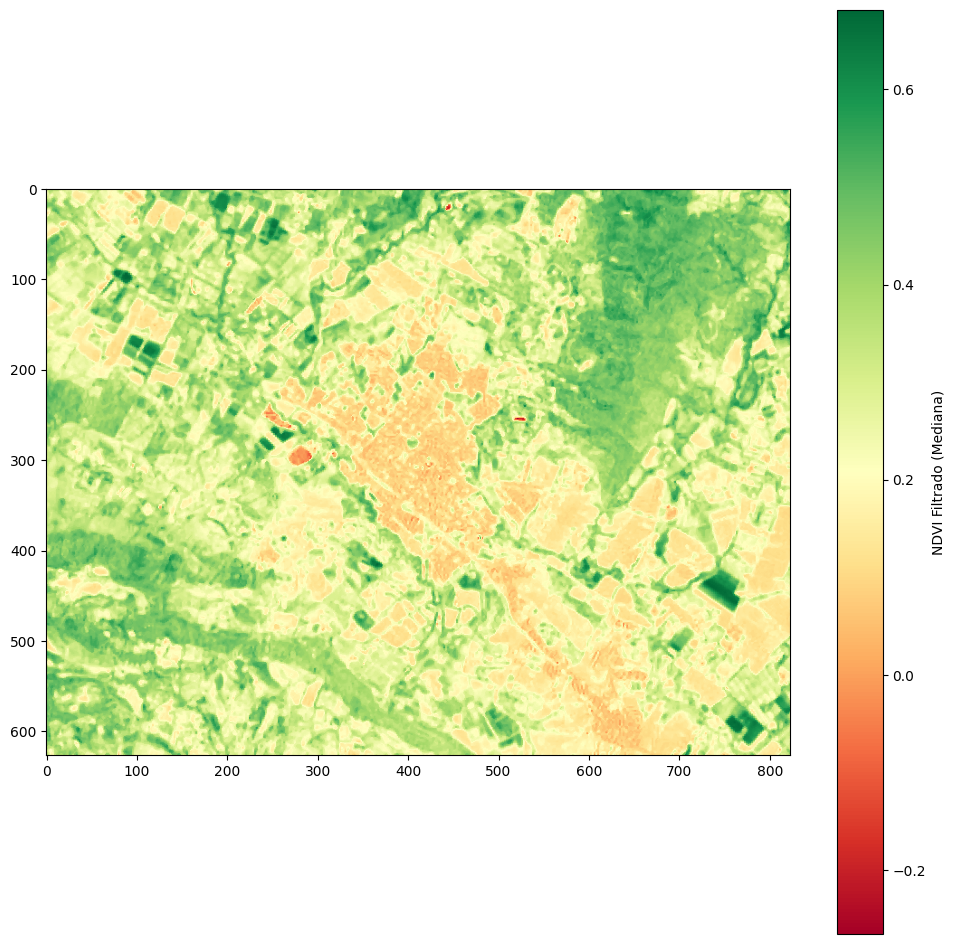

In [ ]:
from scipy.ndimage import median_filter

NDVI_mediana = median_filter(NDVI, size=3)
plt.subplots(figsize = (12, 12)) # tamaño del filtro
plt.imshow(NDVI_mediana, cmap='RdYlGn')
plt.colorbar(label='NDVI Filtrado (Mediana)')

In [ ]:
def load_image(file_path):
    # Cargar imagen y extraer bandas
    imagen_satelital = rasterio.open(file_path)
    bandas = {i: imagen_satelital.read(i) / imagen_satelital.read(i).max() for i in range(1, 8)}
    return bandas

def calculate_ndvi(bandas):
    # Cálculo del NDVI
    banda_infrarojo = bandas[5]  # Verifica que sea la banda correcta
    banda_rojo = bandas[4]
    NDVI = (banda_infrarojo - banda_rojo) / (banda_infrarojo + banda_rojo)
    return NDVI

def apply_filter(image, filter_type='gaussian', **kwargs):
    # Aplicar filtro basado en el tipo
    if filter_type == 'gaussian':
        return gaussian_filter(image, sigma=kwargs.get('sigma', 2))
    elif filter_type == 'median':
        return median_filter(image, size=kwargs.get('size', 3))
    elif filter_type == 'laplace':
        return laplace(image)
    else:
        raise ValueError("Filtro no reconocido")

def plot_image(image, cmap='RdYlGn', title=''):
    # Mostrar la imagen procesada
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap=cmap)
    plt.colorbar(label=title)
    plt.title(title)
    plt.show()


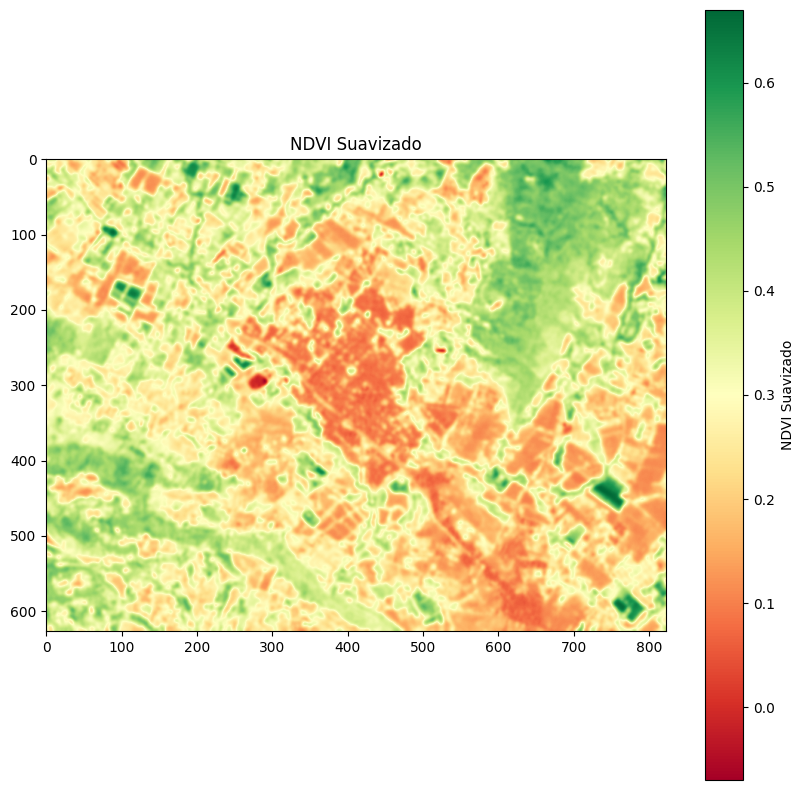

In [ ]:
# 1. Cargar las bandas
file_path = "/content/drive/MyDrive/proyecto2/TIFF/facatativa2020_2_13_4.tif"
bandas = load_image(file_path)

# 2. Calcular el NDVI
NDVI = calculate_ndvi(bandas)

# 3. Aplicar un filtro (por ejemplo, suavizado gaussiano)
NDVI_suavizado = apply_filter(NDVI, filter_type='gaussian', sigma=2)

# 4. Visualizar el NDVI procesado
plot_image(NDVI_suavizado, cmap='RdYlGn', title='NDVI Suavizado')


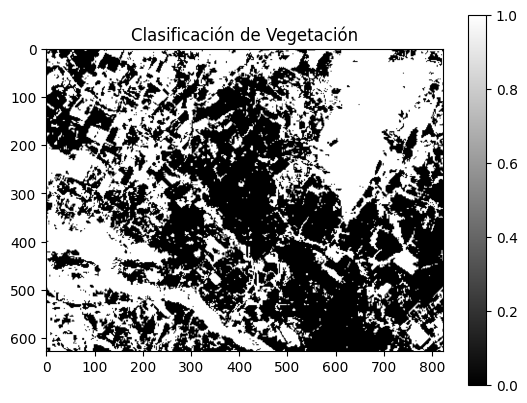

In [ ]:
NDVI_clasificado = np.where(NDVI > 0.3, 1, 0)  # Umbral de 0.3
plt.imshow(NDVI_clasificado, cmap='gray')
plt.title("Clasificación de Vegetación")
plt.colorbar()


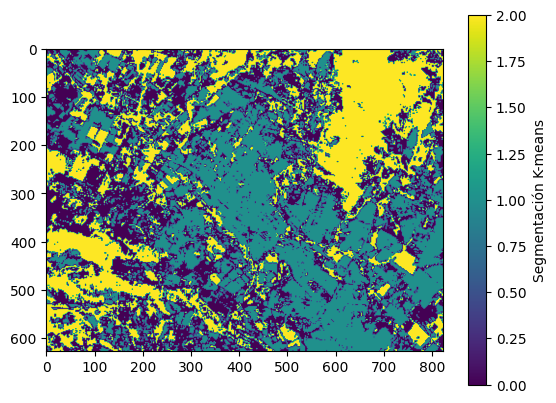

In [ ]:
from sklearn.cluster import KMeans

NDVI_flat = NDVI.flatten().reshape(-1, 1)  # Aplanar
kmeans = KMeans(n_clusters=3, random_state=0).fit(NDVI_flat)
NDVI_segmentado = kmeans.labels_.reshape(NDVI.shape)

plt.imshow(NDVI_segmentado, cmap='viridis')
plt.colorbar(label='Segmentación K-means')


In [ ]:
MNDWI = ((banda_verde_norm - banda_infrarojo_norm) / (banda_verde_norm + banda_infrarojo_norm))
MNDWI

array([[-0.51564799, -0.53527421, -0.53767218, ..., -0.86233056,
        -0.65108015, -0.54477672],
       [-0.51441104, -0.535873  , -0.52753219, ..., -0.79170111,
        -0.46969843, -0.41093335],
       [-0.49456627, -0.51538536, -0.51971758, ..., -0.73647424,
        -0.43682663, -0.44013027],
       ...,
       [-0.73334731, -0.5868679 , -0.49182762, ..., -0.73686561,
        -0.69765059, -0.78318425],
       [-0.74107991, -0.62906702, -0.52414307, ..., -0.61485478,
        -0.76819522, -0.74960775],
       [-0.74654475, -0.64404649, -0.5656656 , ..., -0.4015554 ,
        -0.67023683, -0.80100363]])

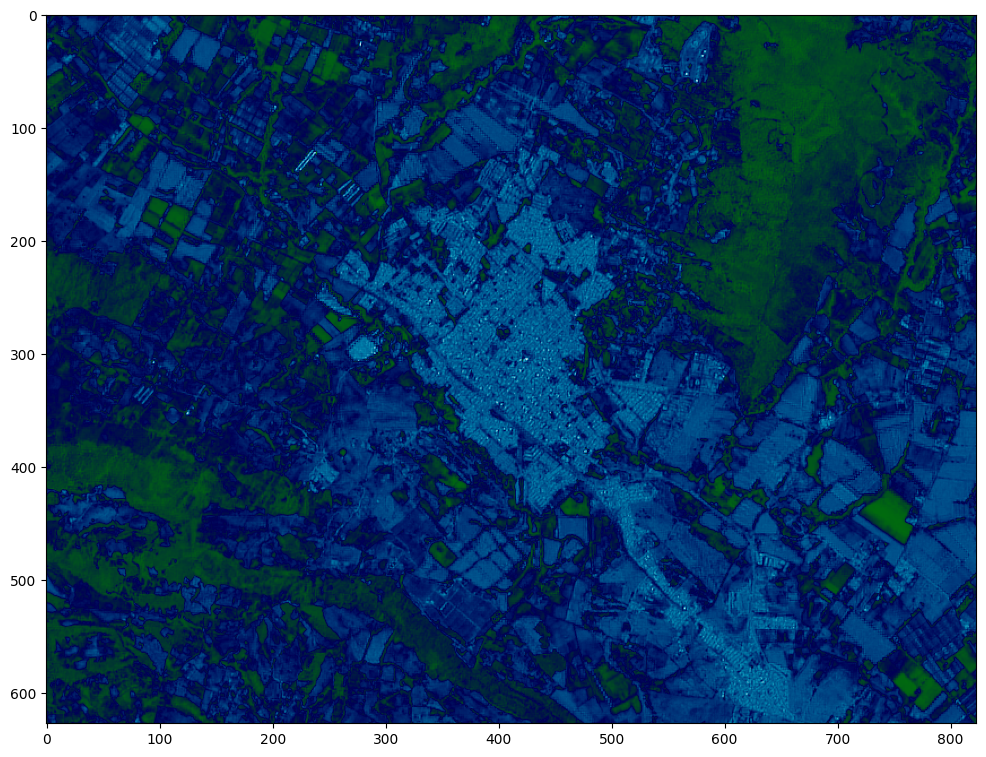

In [ ]:
plt.subplots(figsize = (12, 12))
plt.imshow(MNDWI, cmap = 'ocean')